<a href="https://colab.research.google.com/github/CodesbyGayathri/ObjectDetector/blob/main/Object_Detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [64]:
import cv2
import matplotlib.pyplot as plt

In [65]:
config_file = 'ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'
frozen_model = 'frozen_inference_graph.pb'


In [66]:
model = cv2.dnn_DetectionModel(frozen_model, config_file)

In [67]:
classLabels = []
file_name = 'labels.txt'
with open(file_name, 'rt') as f:
  classLabels = f.read().rstrip('\n').split('\n')

In [68]:
print(len(classLabels))

80


In [69]:
model.setInputSize(320,320)
model.setInputScale(1.0/127.5)
model.setInputMean((127.5, 127, 5, 127.5))
model.setInputSwapRB(True)

< cv2.dnn.Model 0x7a1028d4ea50>

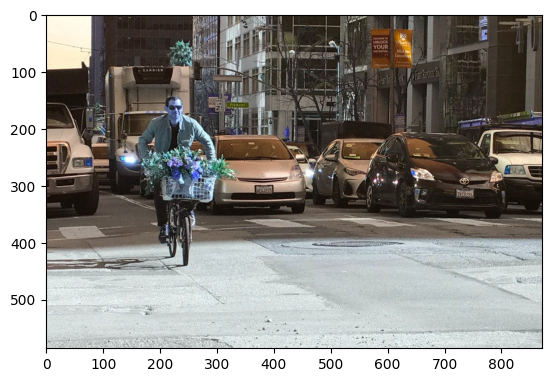

In [71]:
img = cv2.imread('img4.jpg')
plt.imshow(img)

In [72]:
ClassIndex, confidence, bbox = model.detect(img, confThreshold = 0.5)

In [73]:
print(ClassIndex)

[1 3 3 3 3 3 3 3 2 3]


In [74]:
font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN
for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidence.flatten(), bbox):
  if(ClassInd<=80):
    cv2.rectangle(img, boxes, (255,0,0), 2)
    cv2.putText(img, classLabels[ClassInd-1], (boxes[0]+10, boxes[1]+40), font, fontScale=font_scale, color=(0,255,0), thickness = 3)

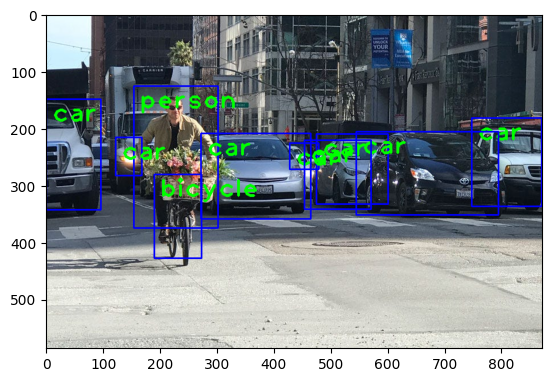

In [75]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [ ]:
#video

cap = cv2.VideoCapture('sample.mp4')
if not cap.isOpened():
  cap = cv2.VideoCapture(0)
if not cap.isOpened():
  raise IOError('Cant open the video')

font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN

while True:
  ret, frame = cap.read()
  ClassIndex, confidence, bbox = model.detect(frame, confThreshold = 0.55)
  print(ClassIndex)
  if(len(ClassIndex)!= 0):
    for ClassInd, conf, boxes in zip(ClassIndex.flattern(), confidence.flattern(), bbox):
      if(ClassInd<=80):
        cv2.rectangle(img, boxes, (255,0,0), 2)
        cv2.putText(img, classLabels[ClassInd-1], (boxes[0]+10, boxes[1]+40), font, fontScale=font_scale, color=(0,255,0), thickness = 3)


  cv2.imshow('Object detection', frame)

  if cv2.waitKey(2) & 0xff == ord('q'):
    break
cap.release()
cv2.destroyAllWindows()